# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [92]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [93]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame
studyMeta = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
studyMeta.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [94]:
# Checking the number of mice.
len(studyMeta["Mouse ID"].unique())

249

In [95]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
doubleDetector = studyMeta[["Mouse ID", "Timepoint"]].value_counts()
MickeyDup = doubleDetector.loc[doubleDetector >= 2, :]
MickeyDup

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
Name: count, dtype: int64

In [96]:
# Optional: Get all the data for the duplicate mouse ID. 
studyMeta.loc[studyMeta["Mouse ID"] == "g989", :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [98]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
studyMeta = studyMeta.loc[studyMeta["Mouse ID"] != "g989", :]

studyMeta.head(25)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [99]:
# Checking the number of mice in the clean DataFrame.
len(studyMeta["Mouse ID"].unique())

248

## Summary Statistics

In [100]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
drugTypes = studyMeta["Drug Regimen"].unique()

drugRegimen = []
for val in range(0, len(drugTypes)):
    drugRegimen.append(drugTypes[val])

drugMean = []
drugMedian = []
drugVariance = []
drugSTDEV = []
drugSEM = []

i = 0
for i in range(0, len(drugTypes)):

    drugMean.append(studyMeta_clean.loc[studyMeta["Drug Regimen"] == drugTypes[i], :]["Tumor Volume (mm3)"].mean())
    drugMedian.append(studyMeta_clean.loc[studyMeta["Drug Regimen"] == drugTypes[i], :]["Tumor Volume (mm3)"].median())
    drugVariance.append(studyMeta_clean.loc[studyMeta["Drug Regimen"] == drugTypes[i], :]["Tumor Volume (mm3)"].var())
    drugSTDEV.append(studyMeta_clean.loc[studyMeta["Drug Regimen"] == drugTypes[i], :]["Tumor Volume (mm3)"].std())
    drugSEM.append(studyMeta_clean.loc[studyMeta["Drug Regimen"] == drugTypes[i], :]["Tumor Volume (mm3)"].sem())


# Assemble the resulting series into a single summary DataFrame.
drugSummary_df = pd.DataFrame({
    "Drug Regimen": drugRegimen,
    "Mean Tumor Volume": drugMean,
    "Median Tumor Volume": drugMedian,
    "Variance of Tumor Volume": drugVariance,
    "St. Dev. of Tumor Volume": drugSTDEV,
    "St. Err. of Tumor Volume": drugSEM,
})


drugSummary_df = drugSummary_df.set_index("Drug Regimen")
drugSummary_df

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,St. Dev. of Tumor Volume,St. Err. of Tumor Volume
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332


In [101]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)


# Using the aggregation method, produce the same summary statistics in a single line

## Bar and Pie Charts

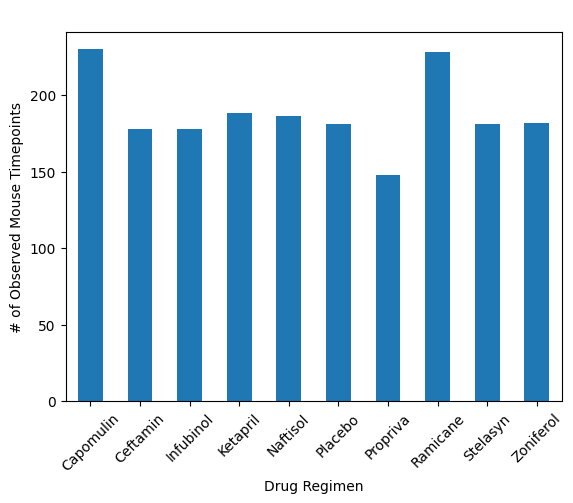

<Figure size 640x480 with 0 Axes>

In [131]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_groups = studyMeta.groupby('Drug Regimen')

drug_timepoints = drug_groups['Timepoint'].count()


studyMeta_chart = drug_timepoints.plot(kind = "bar", title = " ", rot = 45)
studyMeta_chart.set_xlabel("Drug Regimen")
studyMeta_chart.set_ylabel("# of Observed Mouse Timepoints")
plt.show()
plt.tight_layout()



In [134]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
studyMale = len(studyMeta.loc[ studyMeta_clean["Sex"] == "Male", :]["Mouse ID"].unique())
studyFemale = len(studyMeta.loc[ studyMeta_clean["Sex"] == "Female", :]["Mouse ID"].unique())

#plt.bar(x = 1, height = drug_timepoints)
#plt.set_xlabel("Drug Regimen")
#plt.set_ylabel("# of Observed Mouse Timepoints")
#plt.show()
#plt.tight_layout()

print(drug_groups.head())

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0       k403     Ramicane    Male          21          16          0   
1       k403     Ramicane    Male          21          16          5   
2       k403     Ramicane    Male          21          16         10   
3       k403     Ramicane    Male          21          16         15   
4       k403     Ramicane    Male          21          16         20   
10      s185    Capomulin  Female           3          17          0   
11      s185    Capomulin  Female           3          17          5   
12      s185    Capomulin  Female           3          17         10   
13      s185    Capomulin  Female           3          17         15   
14      s185    Capomulin  Female           3          17         20   
454     a203    Infubinol  Female          20          23          0   
455     a203    Infubinol  Female          20          23          5   
456     a203    Infubinol  Female          20          23       

In [153]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
studyMale = len(studyMeta.loc[ studyMeta["Sex"] == "Male", :]["Mouse ID"].unique())
studyFemale = len(studyMeta.loc[ studyMeta["Sex"] == "Female", :]["Mouse ID"].unique())



studySex = pd.DataFrame({
    " ": [0, 1],
    "Male": studyMale,
    "Female": studyFemale
}, index = " ")

#study_pie = studySex.plot.pie(y = "Sex", autopct='%0.2f%%')

#study_pie.set_ylabel("Sex")
#plt.axis("equal")
#plt.show()

TypeError: Index(...) must be called with a collection of some kind, ' ' was passed

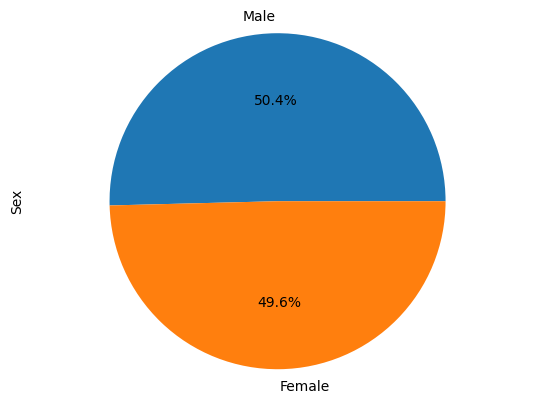

In [154]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
studyMale = len(studyMeta.loc[ studyMeta["Sex"] == "Male", :]["Mouse ID"].unique())
studyFemale = len(studyMeta.loc[ studyMeta["Sex"] == "Female", :]["Mouse ID"].unique())

sexTypes = ["Male", "Female"]
sexList = [studyMale, studyFemale]



plt.pie(sexList, labels = sexTypes, autopct="%.1f%%")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()



## Quartiles, Outliers and Boxplots

In [145]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

mouseName = studyMeta_clean["Mouse ID"].unique()

finalTumorList = []
i = 0
#for i in range(0, len(mouseName)):
#indieMouse = studyMeta_clean.loc[ studyMeta_clean["Mouse ID"] == mouseName[i], : ]

#finalTimepoint = indieMouse["Timepoint"].max()
#finalTumorList.append(studyMeta_clean.loc[ studyMeta_clean["Timepoint"] == finalTimepoint, : ]["Tumor Volume (mm3)"])


    
studyMeta_clean.loc[studyMeta_clean[ "Mouse ID" == 'k403' ], :]




# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


KeyError: False

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [23]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [25]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
